# Sentiment Analysis of Restaurant Reviews

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import zipfile
import os

## Data Collection

In [5]:
reviews_df = pd.read_csv(r"..\data\Restaurant_Reviews.csv")

In [6]:
reviews_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


The data has two columns:

1. Reviews - The open-text reviews 
2. Liked - If liked or not.

In [7]:
reviews_df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


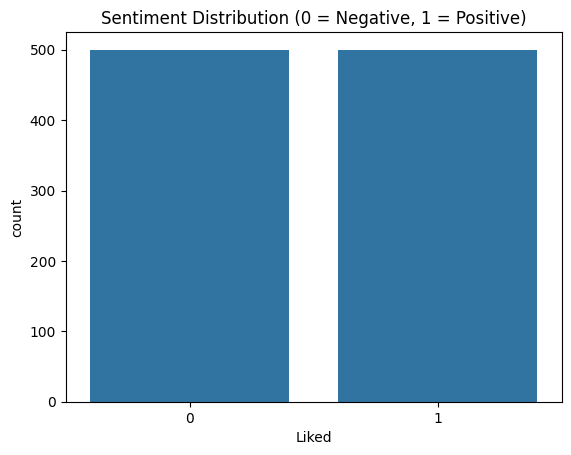

In [9]:
sns.countplot(x='Liked', data=reviews_df)
plt.title('Sentiment Distribution (0 = Negative, 1 = Positive)')
plt.show()

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews_df['Review'])
y = reviews_df['Liked']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       152
           1       0.82      0.79      0.81       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



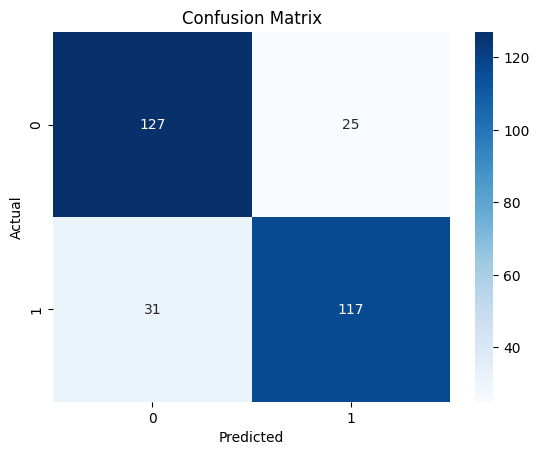

In [13]:
y_pred = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [14]:
print(accuracy_score(y_test, y_pred)*100)

81.33333333333333


In [15]:
import ipywidgets as widgets
from IPython.display import display

def predict_sentiment(review):
    # Transform the input review using the vectorizer
    input_vector = vectorizer.transform([review])
    
    # Predict sentiment
    prediction = logreg_model.predict(input_vector)[0]
    print(prediction)
    # Return the sentiment prediction
    return "Positive" if prediction == 1 else "Negative"

# Text input widget
review_input = widgets.Text(
    placeholder='Enter your review here...',
    description='Review:',
    disabled=False
)

# Button widgets for sample reviews
sample_reviews = [
    "The food was delicious and the service was excellent!",
    "Terrible experience, food was cold and service was slow.",
    "I loved the food",
    "I didn't like the food"
]

sample_buttons = [widgets.Button(description=review) for review in sample_reviews]

def on_button_click(b):
    review_input.value = b.description

for button in sample_buttons:
    button.on_click(on_button_click)

# Output widget for displaying predictions
output = widgets.Output()

def update_output(change):
    output.clear_output()
    with output:
        prediction = predict_sentiment(change['new'])
        print(f"Predicted Sentiment: {prediction}")

review_input.observe(update_output, names='value')

# Display widgets
display(review_input)
display(widgets.HBox(sample_buttons))
display(output)


Text(value='', description='Review:', placeholder='Enter your review here...')

Output()